In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
import xgboost as xgb

In [10]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
from sklearn.metrics import classification_report

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
import pandas as pd

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df=pd.read_csv("marketing_sales_data.csv")


In [19]:
df

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


Data's features
The features in the data are:

TV promotional budget (in "Low," "Medium," and "High" categories)
Social media promotional budget (in millions of dollars)
Radio promotional budget (in millions of dollars)
Sales (in millions of dollars)
Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

In [20]:
df.describe()

,Radio,Social Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


In [21]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [22]:
df.shape

(572, 5)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

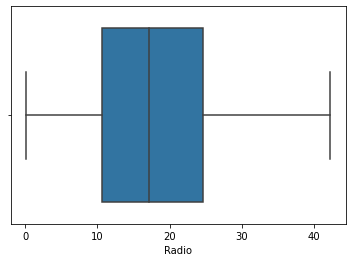

In [23]:
sns.boxplot(df['Radio'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social Media'>

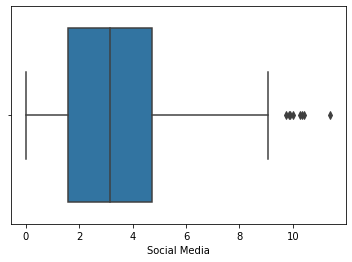

In [24]:
sns.boxplot(df['Social Media'])

In [25]:
q1=df['Social Media'].quantile(0.25)

In [26]:
q3=df['Social Media'].quantile(0.75)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
upper=q3+1.5*IQR

In [30]:
df=df[(df['Social Media']>lower) & (df['Social Media']<upper)]

In [31]:
df

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


In [32]:
df['Sales_Range']=pd.qcut(df['Sales'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18524\3650251149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Range']=pd.qcut(df['Sales'],4)


In [33]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,Low,3.518070,2.293790,Micro,55.261284,"(33.509, 115.616]"
1,Low,7.756876,2.572287,Mega,67.574904,"(33.509, 115.616]"
2,High,20.348988,1.227180,Micro,272.250108,"(262.23, 357.788]"
3,Medium,20.108487,2.728374,Mega,195.102176,"(182.205, 262.23]"
4,High,31.653200,7.776978,Nano,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266,"(182.205, 262.23]"
568,High,28.110171,7.358169,Mega,297.626731,"(262.23, 357.788]"
569,Medium,11.401084,5.818697,Nano,145.416851,"(115.616, 182.205]"
570,Medium,21.119991,5.703028,Macro,209.326830,"(182.205, 262.23]"


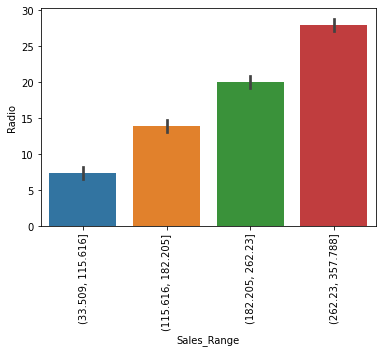

In [34]:
sns.barplot(x=df['Sales_Range'],y=df['Radio'])
plt.xticks(rotation=90)
plt.show()

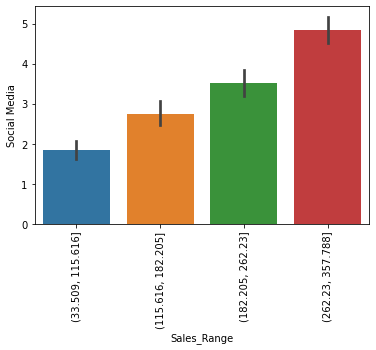

In [35]:
sns.barplot(x=df['Sales_Range'],y=df['Social Media'])
plt.xticks(rotation=90)
plt.show()

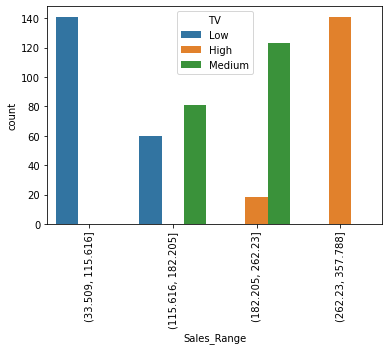

In [36]:
sns.countplot(x=df['Sales_Range'],hue=df['TV'])
plt.xticks(rotation=90)
plt.show()

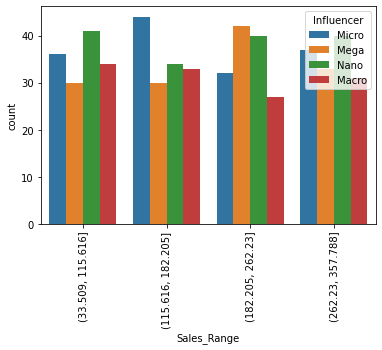

In [37]:
sns.countplot(x=df['Sales_Range'],hue=df['Influencer'])
plt.xticks(rotation=90)
plt.show()

In [38]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,Low,3.518070,2.293790,Micro,55.261284,"(33.509, 115.616]"
1,Low,7.756876,2.572287,Mega,67.574904,"(33.509, 115.616]"
2,High,20.348988,1.227180,Micro,272.250108,"(262.23, 357.788]"
3,Medium,20.108487,2.728374,Mega,195.102176,"(182.205, 262.23]"
4,High,31.653200,7.776978,Nano,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266,"(182.205, 262.23]"
568,High,28.110171,7.358169,Mega,297.626731,"(262.23, 357.788]"
569,Medium,11.401084,5.818697,Nano,145.416851,"(115.616, 182.205]"
570,Medium,21.119991,5.703028,Macro,209.326830,"(182.205, 262.23]"


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

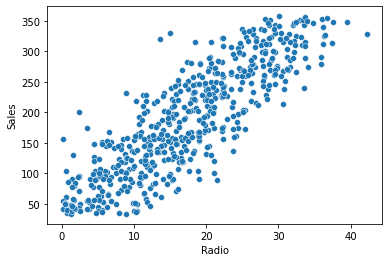

In [39]:
sns.scatterplot(x=df['Radio'],y=df['Sales'])

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

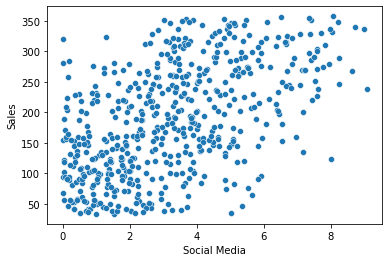

In [40]:
sns.scatterplot(x=df['Social Media'],y=df['Sales'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

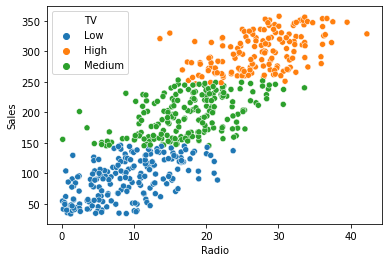

In [41]:
sns.scatterplot(x=df['Radio'],y=df['Sales'],hue=df['TV'])

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

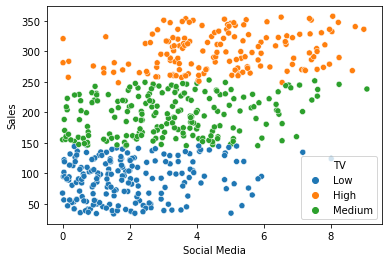

In [42]:
sns.scatterplot(x=df['Social Media'],y=df['Sales'],hue=df['TV'])

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

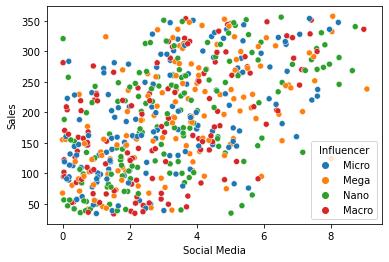

In [43]:

sns.scatterplot(x=df['Social Media'],y=df['Sales'],hue=df['Influencer'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

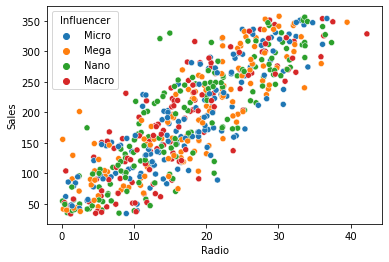

In [44]:
sns.scatterplot(x=df['Radio'],y=df['Sales'],hue=df['Influencer'])

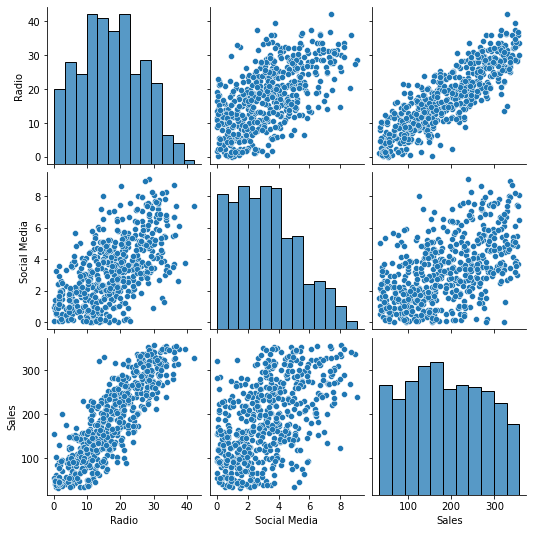

In [45]:
sns.pairplot(data=df)

In [46]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,Low,3.518070,2.293790,Micro,55.261284,"(33.509, 115.616]"
1,Low,7.756876,2.572287,Mega,67.574904,"(33.509, 115.616]"
2,High,20.348988,1.227180,Micro,272.250108,"(262.23, 357.788]"
3,Medium,20.108487,2.728374,Mega,195.102176,"(182.205, 262.23]"
4,High,31.653200,7.776978,Nano,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266,"(182.205, 262.23]"
568,High,28.110171,7.358169,Mega,297.626731,"(262.23, 357.788]"
569,Medium,11.401084,5.818697,Nano,145.416851,"(115.616, 182.205]"
570,Medium,21.119991,5.703028,Macro,209.326830,"(182.205, 262.23]"


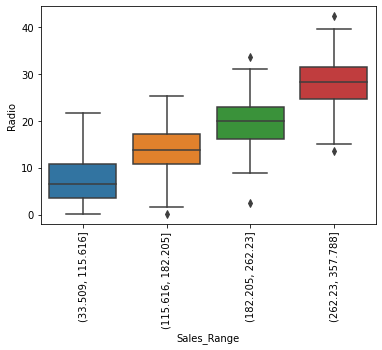

In [47]:
sns.boxplot(x=df['Sales_Range'],y=df['Radio'])
plt.xticks(rotation=90)
plt.show()

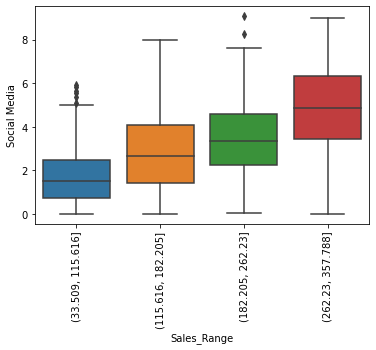

In [48]:
sns.boxplot(x=df['Sales_Range'],y=df['Social Media'])
plt.xticks(rotation=90)
plt.show()

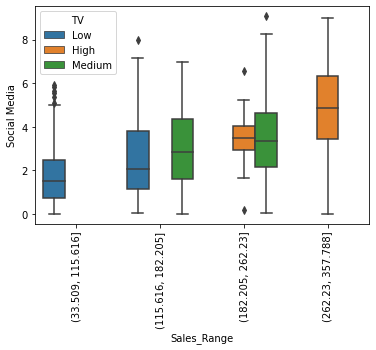

In [49]:
sns.boxplot(x=df['Sales_Range'],y=df['Social Media'],hue=df['TV'])
plt.xticks(rotation=90)
plt.show()

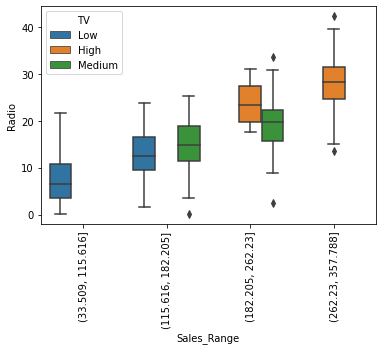

In [50]:
sns.boxplot(x=df['Sales_Range'],y=df['Radio'],hue=df['TV'])
plt.xticks(rotation=90)
plt.show()

In [51]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,Low,3.518070,2.293790,Micro,55.261284,"(33.509, 115.616]"
1,Low,7.756876,2.572287,Mega,67.574904,"(33.509, 115.616]"
2,High,20.348988,1.227180,Micro,272.250108,"(262.23, 357.788]"
3,Medium,20.108487,2.728374,Mega,195.102176,"(182.205, 262.23]"
4,High,31.653200,7.776978,Nano,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266,"(182.205, 262.23]"
568,High,28.110171,7.358169,Mega,297.626731,"(262.23, 357.788]"
569,Medium,11.401084,5.818697,Nano,145.416851,"(115.616, 182.205]"
570,Medium,21.119991,5.703028,Macro,209.326830,"(182.205, 262.23]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

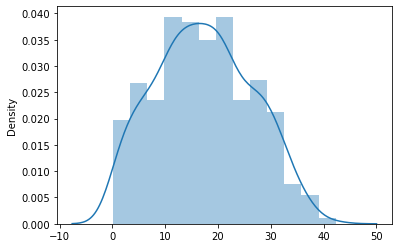

In [52]:
sns.distplot(x=df['Radio'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social Media', ylabel='Density'>

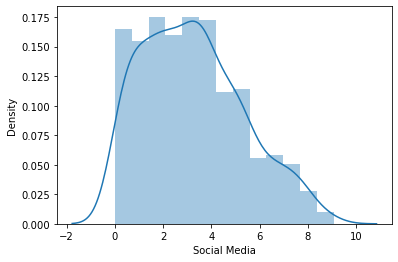

In [53]:
sns.distplot(df['Social Media'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

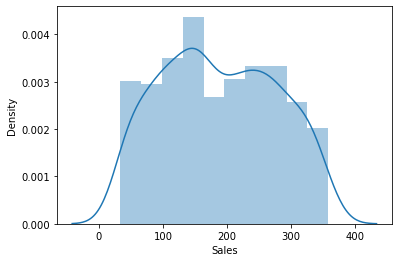

In [54]:
sns.distplot(df['Sales'])

In [55]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,Low,3.518070,2.293790,Micro,55.261284,"(33.509, 115.616]"
1,Low,7.756876,2.572287,Mega,67.574904,"(33.509, 115.616]"
2,High,20.348988,1.227180,Micro,272.250108,"(262.23, 357.788]"
3,Medium,20.108487,2.728374,Mega,195.102176,"(182.205, 262.23]"
4,High,31.653200,7.776978,Nano,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266,"(182.205, 262.23]"
568,High,28.110171,7.358169,Mega,297.626731,"(262.23, 357.788]"
569,Medium,11.401084,5.818697,Nano,145.416851,"(115.616, 182.205]"
570,Medium,21.119991,5.703028,Macro,209.326830,"(182.205, 262.23]"


In [56]:
le=LabelEncoder()


In [57]:
df['TV']=le.fit_transform(df['TV'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18524\2393668798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TV']=le.fit_transform(df['TV'])


In [58]:
df['Influencer']=le.fit_transform(df['Influencer'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18524\3243106852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Influencer']=le.fit_transform(df['Influencer'])


In [59]:
df

,TV,Radio,Social Media,Influencer,Sales,Sales_Range
0,1,3.518070,2.293790,2,55.261284,"(33.509, 115.616]"
1,1,7.756876,2.572287,1,67.574904,"(33.509, 115.616]"
2,0,20.348988,1.227180,2,272.250108,"(262.23, 357.788]"
3,2,20.108487,2.728374,1,195.102176,"(182.205, 262.23]"
4,0,31.653200,7.776978,3,273.960377,"(262.23, 357.788]"
...,...,...,...,...,...,...
567,2,14.656633,3.817980,2,191.521266,"(182.205, 262.23]"
568,0,28.110171,7.358169,1,297.626731,"(262.23, 357.788]"
569,2,11.401084,5.818697,3,145.416851,"(115.616, 182.205]"
570,2,21.119991,5.703028,0,209.326830,"(182.205, 262.23]"


In [60]:
df=df.drop('Sales_Range',axis=1)


In [61]:
df

,TV,Radio,Social Media,Influencer,Sales
0,1,3.518070,2.293790,2,55.261284
1,1,7.756876,2.572287,1,67.574904
2,0,20.348988,1.227180,2,272.250108
3,2,20.108487,2.728374,1,195.102176
4,0,31.653200,7.776978,3,273.960377
...,...,...,...,...,...
567,2,14.656633,3.817980,2,191.521266
568,0,28.110171,7.358169,1,297.626731
569,2,11.401084,5.818697,3,145.416851
570,2,21.119991,5.703028,0,209.326830


In [62]:
y=df['Sales']

In [63]:
X=df.drop('Sales',axis=1)

In [64]:
sc=StandardScaler()

In [65]:
X=sc.fit_transform(X)


In [66]:
X

array([[-0.09994893, -1.50583183, -0.4499847 ,  0.36704516],
       [-0.09994893, -1.04309174, -0.31695415, -0.53301341],
       [-1.35264216,  0.33155831, -0.95947647,  0.36704516],
       ...,
       [ 1.1527443 , -0.64526242,  1.2337714 ,  1.26710374],
       [ 1.1527443 ,  0.41572688,  1.17851956, -1.43307198],
       [-0.09994893, -0.44656077,  0.20288854,  0.36704516]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
X_train.shape

(451, 4)

In [69]:
X_test.shape

(113, 4)

# RandomForestRegressor

In [70]:
rfr=RandomForestRegressor()


In [71]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=rfr.predict(X_train)


In [73]:
y_pred

array([ 98.26844808,  81.60748993, 114.93860449,  53.71611111,
       154.2141263 ,  52.87579996,  90.65920821,  62.57759473,
       151.01045864,  92.02961999,  90.87595686, 270.50526926,
        69.67932716,  81.6204368 ,  58.60146701, 177.22029885,
       295.72626414, 198.23237747, 304.83531963, 330.06576605,
       113.81635089, 162.67206972, 280.46763428, 302.34486751,
       171.95382964, 199.33365043, 286.01770368,  65.24333674,
       121.70883242,  92.86226379, 217.44854391, 128.07347608,
       205.49238385,  68.56639916, 185.35483344,  82.98119035,
       204.7210184 , 336.93559332, 100.07921665, 320.78536419,
       168.81762465, 298.31079779, 168.50222723, 263.21238363,
        48.81330024, 226.92625073,  89.15810251,  82.26296147,
        76.46121364, 331.27204632, 204.92739034, 283.83136153,
       214.59610683, 306.17935422, 224.71727461, 305.50922528,
       221.82184133, 287.72785845,  94.26901695, 329.71196129,
       193.03128168, 199.98055896, 124.72415028,  90.95

In [74]:
r2_score(y_train,y_pred)

0.9831908605905191

In [75]:
y_pred=rfr.predict(X_test)


In [76]:
r2_score(y_test,y_pred)

0.9069171896386587

In [77]:
KF=KFold(5)


In [78]:
scores=cross_val_score(rfr,X_test,y_test)

In [79]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9154795948952705
1 0.827090039668761
2 0.8941075212554678
3 0.847271781758437
4 0.8853497335612074


In [80]:
scores.mean()

0.8738597342278286

# KNeighborsRegressor

In [81]:
knr=KNeighborsRegressor()


In [82]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [83]:
y_pred=knr.predict(X_train)


In [84]:
y_pred

array([109.44342927,  83.77617674, 121.23084981,  56.68665934,
       164.59711424,  68.76043516,  78.49654491,  68.76043516,
       157.06766758,  74.85657807,  81.11217181, 283.9499888 ,
        74.12921086,  75.41701218,  62.53538818, 203.87871178,
       288.80149404, 177.14024654, 296.91786826, 311.48260524,
       110.86169728, 172.12322296, 288.30244296, 290.53641936,
       184.1061321 , 196.51946854, 300.88601658, 114.23964827,
       116.07909946, 118.289121  , 204.96040062, 111.17533567,
       191.2539355 ,  80.67919182, 202.07399484,  68.50796489,
       211.9003295 , 332.84224274, 124.31015515, 317.2737794 ,
       170.05479772, 288.30244296, 194.64342606, 274.62210208,
        55.85504253, 193.25315926,  88.99445865, 114.36897346,
        73.98919111, 326.48333414, 216.49868448, 288.11555638,
       194.74938716, 295.58216976, 200.28685846, 298.60503916,
       196.51946854, 285.76706934, 109.91525821, 308.37584584,
       194.28883004, 201.5511404 , 104.78428264,  74.12

In [85]:
r2_score(y_train,y_pred)

0.9142570041391187

In [86]:
y_pred=knr.predict(X_test)


In [87]:
r2_score(y_test,y_pred)

0.8797048151512763

In [88]:
KF=KFold(5)


In [89]:
scores=cross_val_score(knr,X_test,y_test)

In [90]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.884042659129814
1 0.748551491003487
2 0.8468164669303366
3 0.902492435125718
4 0.8301431678105172


In [91]:
scores.mean()

0.8424092439999745

# XGBRegressor

In [92]:
xgb_i=xgb.XGBRegressor()

In [93]:
xgb_i=KNeighborsRegressor()


In [94]:
xgb_i.fit(X_train,y_train)

KNeighborsRegressor()

In [95]:
y_pred=xgb_i.predict(X_train)


In [96]:
y_pred

array([109.44342927,  83.77617674, 121.23084981,  56.68665934,
       164.59711424,  68.76043516,  78.49654491,  68.76043516,
       157.06766758,  74.85657807,  81.11217181, 283.9499888 ,
        74.12921086,  75.41701218,  62.53538818, 203.87871178,
       288.80149404, 177.14024654, 296.91786826, 311.48260524,
       110.86169728, 172.12322296, 288.30244296, 290.53641936,
       184.1061321 , 196.51946854, 300.88601658, 114.23964827,
       116.07909946, 118.289121  , 204.96040062, 111.17533567,
       191.2539355 ,  80.67919182, 202.07399484,  68.50796489,
       211.9003295 , 332.84224274, 124.31015515, 317.2737794 ,
       170.05479772, 288.30244296, 194.64342606, 274.62210208,
        55.85504253, 193.25315926,  88.99445865, 114.36897346,
        73.98919111, 326.48333414, 216.49868448, 288.11555638,
       194.74938716, 295.58216976, 200.28685846, 298.60503916,
       196.51946854, 285.76706934, 109.91525821, 308.37584584,
       194.28883004, 201.5511404 , 104.78428264,  74.12

In [97]:
r2_score(y_train,y_pred)

0.9142570041391187

In [98]:
y_pred=xgb_i.predict(X_test)


In [99]:
r2_score(y_test,y_pred)

0.8797048151512763

In [100]:
KF=KFold(5)


In [101]:
scores=cross_val_score(xgb_i,X_test,y_test)

In [102]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.884042659129814
1 0.748551491003487
2 0.8468164669303366
3 0.902492435125718
4 0.8301431678105172


In [103]:
scores.mean()

0.8424092439999745

In [104]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(4,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])

In [105]:
model.compile(optimizer='adam',
    loss="mse")

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [107]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 42189.3789 - val_loss: 44191.4219
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 42115.2695 - val_loss: 44110.2695
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 42035.8906 - val_loss: 44026.3477
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 41951.2305 - val_loss: 43929.5039
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 41851.8984 - val_loss: 43818.0898
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 41735.2852 - val_loss: 43684.9492
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 41596.4570 - val_loss: 43519.6094
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 41421.9180 - val_loss: 43319.3125
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 41208.1602 - val_loss: 43072.8398
Epoch 10/100
12/12 [================

In [108]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [109]:
r2_score(y_test,y_pred)

0.814321183793265

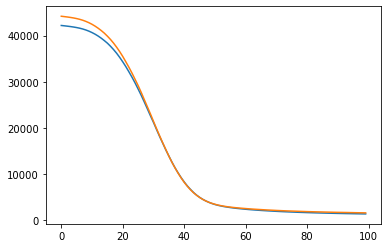

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# RandomForestRegressor

In [111]:
rfr=RandomForestRegressor()


In [112]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_pred=rfr.predict(X_train)

In [114]:
r2_score(y_train,y_pred)

0.9836752815797021

In [115]:
y_pred=rfr.predict(X_test)

In [116]:
r2_score(y_test,y_pred)

0.906497497007627

In [117]:
mean_squared_error(y_test,y_pred)

763.3678478566181

In [118]:
kf=KFold(5)


In [119]:
scores=cross_val_score(rfr,X_test,y_test,cv=kf)

In [120]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9219455186329006
1 0.8458518474256351
2 0.8947759433896615
3 0.8471598338010807
4 0.8808418777452497


In [121]:
scores.mean()

0.8781150041989056

# KNeighborsRegressor

In [122]:
knc=KNeighborsRegressor()


In [123]:
knc.fit(X_train,y_train)

KNeighborsRegressor()

In [124]:
y_pred=knc.predict(X_train)

In [125]:
r2_score(y_train,y_pred)

0.9142570041391187

In [126]:
y_pred=knc.predict(X_test)

In [127]:
r2_score(y_test,y_pred)

0.8797048151512763

In [128]:
mean_squared_error(y_test,y_pred)

982.1071460832969

In [129]:
kf=KFold(5)


In [130]:
scores=cross_val_score(knc,X_test,y_test,cv=kf)

In [131]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.884042659129814
1 0.748551491003487
2 0.8468164669303366
3 0.902492435125718
4 0.8301431678105172


In [132]:
scores.mean()

0.8424092439999745

# LinearRegression

In [133]:
lr=LinearRegression()


In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred=lr.predict(X_train)

In [136]:
r2_score(y_train,y_pred)

0.754756684716047

In [137]:
y_pred=lr.predict(X_test)

In [138]:
r2_score(y_test,y_pred)

0.6777698512585904

In [139]:
mean_squared_error(y_test,y_pred)

2630.733159938111

In [140]:
kf=KFold(5)


In [141]:
scores=cross_val_score(lr,X_test,y_test,cv=kf)

In [142]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7683889339120684
1 0.48366025068660357
2 0.7236715665172104
3 0.8021990217888392
4 0.5223978401188422


In [143]:
scores.mean()

0.6600635226047127

# XGBClassifier

In [144]:
xgb_i=xgb.XGBRegressor()

In [145]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [146]:
y_pred=xgb_i.predict(X_train)

In [147]:
r2_score(y_train,y_pred)

0.9990704617615632

In [148]:
y_pred=xgb_i.predict(X_test)

In [149]:
r2_score(y_test,y_pred)

0.8836565614326186

In [150]:
mean_squared_error(y_test,y_pred)

949.8445225435848

In [151]:
kf=KFold(5)


In [152]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=kf)

In [153]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8882958152089118
1 0.6969228123691944
2 0.9011675671352768
3 0.8210193185189415
4 0.8346059584659798


In [154]:
scores.mean()

0.828402294339661